In [41]:
import pandas as pd
import numpy as np

# 之前出现Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.添加了lineterminator参数

train = pd.read_csv('train.csv', lineterminator="\n")
# train

xtrain = np.array(train['review'])
xtrain[6]

labels = np.array(train['label'])
labels[5]

xtrain_fc = []
for each in xtrain:
    tmp = []
    for i in each.split(' '):
        tmp.append(i)
    xtrain_fc.append(tmp)
# xtrain_fc[2]

words = set([])
for each in xtrain_fc:
    for i in each:
        words.add(i)
# print(words)

dic = {}

k = 0
for each in words:
    dic[each] = k
    k += 1
matrix = np.zeros((len(xtrain_fc), len(words)))
for i in range(len(xtrain_fc)):
    for ea in xtrain_fc[i]:
        matrix[i, dic[ea]] = 1.0
print(matrix)

x_train = np.asarray(matrix)
x_train[0]
y_train = np.asarray(labels)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['Negative' 'Positive' 'Negative' ... 'Negative' 'Negative' 'Positive']


In [42]:
count = np.zeros(len(words))
all_dic = {}
pos_dic = {}
neg_dic = {}

for i in range(len(xtrain_fc)):
    for each in xtrain_fc[i]:
        all_dic[each] = all_dic.get(each, 0) + 1
        if y_train[i] == 'Positive':
            pos_dic[each] = pos_dic.get(each, 0) + 1
        else:
            neg_dic[each] = neg_dic.get(each, 0) + 1
print(all_dic['1994'])
print(pos_dic['1994'])
print(neg_dic['1994'])
print(all_dic['thank'])
print(pos_dic['thank'])
print(neg_dic['thank'])

10
7
3
8
6
2


In [45]:
delit = []

for each in words:
    if 0.8 < neg_dic.get(each, 0) / pos_dic.get(each, 0.1) < 1.2:
        delit.append(dic[each])
xtrain = np.delete(x_train, delit, axis=1)
ytrain = y_train

In [49]:
print(len(x_train[0]))
print(len(xtrain[0]))

23097
21555


In [50]:
from tensorflow.keras import models
from tensorflow.keras import layers

# print(len(y_train))

x_tr = xtrain[:-2000]
x_test = xtrain[-2000:]
# print(len(x_test))
ys = []
for each in ytrain:
    if each == 'Positive':
        ys.append(1.0)
    else:
        ys.append(0.0)
y_tr = ys[:-2000]
y_test = ys[-2000:]
# print(len(y_test))

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(len(x_tr[0]),)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

# print(len(x_tr))

history = model.fit(x_tr, y_tr, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 4328 samples, validate on 2000 samples
Epoch 1/20
4328/4328 [==============================] - 4s 929us/sample - loss: 0.6724 - acc: 0.6490 - val_loss: 0.6374 - val_acc: 0.7155
Epoch 2/20
4328/4328 [==============================] - 3s 796us/sample - loss: 0.5759 - acc: 0.8498 - val_loss: 0.5885 - val_acc: 0.7565
Epoch 3/20
4328/4328 [==============================] - 3s 806us/sample - loss: 0.4736 - acc: 0.9113 - val_loss: 0.5514 - val_acc: 0.7725
Epoch 4/20
4328/4328 [==============================] - 4s 881us/sample - loss: 0.3826 - acc: 0.9415 - val_loss: 0.5214 - val_acc: 0.7735
Epoch 5/20
4328/4328 [==============================] - 3s 799us/sample - loss: 0.3040 - acc: 0.9623 - val_loss: 0.4991 - val_acc: 0.7780
Epoch 6/20
4328/4328 [==============================] - 3s 799us/sample - loss: 0.2375 - acc: 0.9727 - val_loss: 0.4855 - val_acc: 0.7835
Epoch 7/20
4328/4328 [==============================] - 4s 892us/sample - loss: 0.1845 - acc: 0.9806 - val_loss: 0.4780 - va

In [51]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

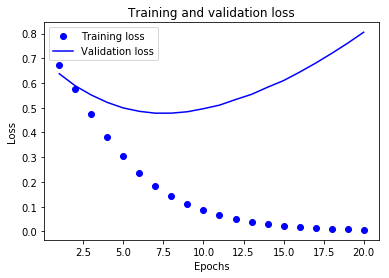

In [53]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

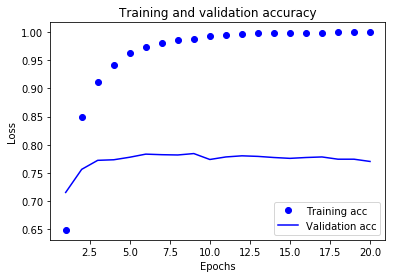

In [54]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [55]:
y_predict = model.predict(x_test)

In [56]:
# print(y_test)
print(y_predict.reshape(len(y_predict)))
y_predict = y_predict.reshape(len(y_predict))
print(len(y_predict))

[0.9994718  0.08332565 0.9999871  ... 0.04053071 0.01366752 0.00468099]
2000


In [57]:
y = []
for i in range(len(y_test)):
    if y_test[i] == 1.0:
        y.append(2)
    elif y_test[i] == 0.0:
        y.append(1)

In [61]:
# print(y_test)

In [62]:
# print(y)
# print(y_predict)

In [60]:
import numpy as np
from sklearn import metrics
y = np.array(y)
pred = np.array(y_predict)
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

0.8374074302236219